In [1]:
from langchain.embeddings import OpenAIEmbeddings

# Initialize the embedding model using ChatOpenAI
# embedding_model = OpenAIEmbeddings(model="text-embedding-ada-002")
embedding_model = OpenAIEmbeddings(model="text-embedding-3-large")


# Generate embeddings for the document chunks
def embed_chunks(chunks):
    embeddings = embedding_model.embed_documents(chunks)
    return embeddings


# Embed the document chunks
chunks = ["CC(C)CC1=CC=C(C=C1)C(C)C(=O)O"]
embeddings = embed_chunks(chunks)
print(f"Number of embeddings: {len(embeddings[0])}")
print(embeddings[0])  # Preview the first embedding

/var/folders/y2/hzjfncr92llg100m08nwxmhc0000gn/T/ipykernel_73040/2466346676.py:5: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAIEmbeddings`.
  embedding_model = OpenAIEmbeddings(model="text-embedding-3-large")


Number of embeddings: 3072
[-0.019389189381055248, -0.004630004891913049, -0.002536473743613657, 0.04429426698200696, -0.007901930087738715, -0.019740201126919606, -0.012987414107885138, 0.010496905788996433, -0.04362567424472919, 0.04275650443132614, -0.04476228264315944, -0.019890633934013573, 0.006389239205912278, -0.013405284568683742, -0.005850186451180462, -0.01783471145314895, -0.0376752011181312, -0.0023296277025369005, 0.0170574724891958, 0.020659515209353982, 0.027512590766451094, -0.009460586859951383, 0.016196658501760375, -0.010580479881156154, 0.018754025535583325, 0.007454809113779359, 0.004947586348987732, 0.048907558359339645, -0.022013416061134994, 0.008169367741443355, -0.006067478904531225, 0.017517130461735544, 0.019155181550479006, 0.05027817458834613, 0.003376393276686596, 0.0026075115356849086, -0.0020663693587999075, -0.009886815009362726, 0.010020533370553768, -0.04228848877017366, 0.009702952379140362, -0.005787505649230033, -0.02326702651220825, 0.0635163100

# Data preparation

In [1]:
import pandas as pd
import numpy as np
import joblib

In [3]:
# Load pd_train
pd_train = pd.read_csv("data_smiles/Training_Group.csv")
pd_train["label"] = pd_train["Liver"].apply(lambda x: 1 if x == "Hepatotoxicity" else 0)
print(pd_train.shape)

(1241, 3)


In [4]:
pd_train["label"].value_counts()

label
1    683
0    558
Name: count, dtype: int64

In [5]:
# Load pd_test
pd_test = pd.read_csv("data_smiles/Testing_Group.csv")
pd_test["label"] = pd_test["Liver"].apply(lambda x: 1 if x == "Hepatotoxicity" else 0)
print(pd_test.shape)

(286, 3)


In [6]:
pd_test["label"].value_counts()

label
1    221
0     65
Name: count, dtype: int64

In [7]:
%%time
# Define the function to embed SMILES strings
def embed_smiles(smiles_list):
    embeddings = embedding_model.embed_documents(smiles_list)
    return embeddings


# Apply embedding to each SMILES string
pd_train["Embeddings"] = embed_smiles(pd_train["Smiles"].tolist())
print(f"Generated {len(pd_train['Embeddings'])} embeddings.")
print("Preview of first embedding:", pd_train["Embeddings"][0])

# Save the embeddings
joblib.dump(pd_train, "data_smiles/Training_Group_openai_embeddings_v3.pkl")

Generated 1241 embeddings.
Preview of first embedding: [-0.006623111399430217, -0.012318593886806277, -0.003118954706555016, 0.0003812711067211429, 0.00014948676962677518, 0.005015483856070344, -0.002719995922206671, 0.019951877314765953, -0.03477821359526867, 0.04845680474468638, -0.024134066849901395, -0.02399256542888378, -0.002057684735697522, 0.007059411328078438, 0.013859400900764481, 0.013702175961350696, -0.022058694669407308, -0.010085995835575864, -0.013285529266544515, 0.01241292940924807, 0.03594168131342731, 0.00010219637942117056, 0.011611080262460436, -0.024275570133564087, 0.025344702329280933, -0.0013236395949108779, 0.001631211423970321, 0.03820572267615992, -0.036381910026198866, 0.0026944467182120186, -0.014818474986965903, -0.007464266082579395, 0.01963742743593838, 0.011689693197828598, -0.023976842841810148, -0.02576921031762393, -0.0077590631932261955, -0.017750724437682802, -0.019087138751006323, -0.024574297425318026, -0.0022483201726427766, -0.003793057833369

['data_smiles/Training_Group_openai_embeddings_v3.pkl']

In [8]:
%%time
pd_test["Embeddings"] = embed_smiles(pd_test["Smiles"].tolist())
joblib.dump(pd_test, "data_smiles/Testing_Group_openai_embeddings_v3.pkl")

CPU times: user 252 ms, sys: 122 ms, total: 374 ms
Wall time: 8.79 s


['data_smiles/Testing_Group_openai_embeddings_v3.pkl']

## Load embedding

In [2]:
# load the embeddings
pd_train = joblib.load("data_smiles/Training_Group_openai_embeddings_v3.pkl")
pd_test = joblib.load("data_smiles/Testing_Group_openai_embeddings_v3.pkl")

In [3]:
# Prepare features and labels for the split
X_train = np.vstack(pd_train["Embeddings"].values)  # Stack embeddings into a 2D array
y_train = pd_train["label"].values

print("X_train Shape:", X_train.shape)
print("y_train Shape:", y_train.shape)

X_train Shape: (1241, 3072)
y_train Shape: (1241,)


In [4]:
X_test = np.vstack(pd_test["Embeddings"].values)  # Stack embeddings into a 2D array
y_test = pd_test["label"].values

print("X_test Shape:", X_test.shape)
print("y_test Shape:", y_test.shape)

X_test Shape: (286, 3072)
y_test Shape: (286,)


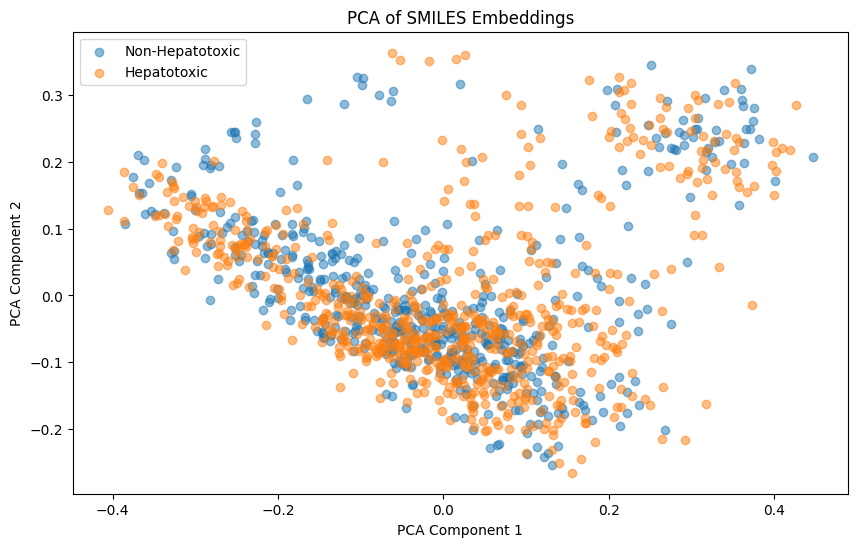

In [9]:
# plot PCA of the embeddings
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA on the training data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Plot the PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[y_train == 0][:, 0], X_train_pca[y_train == 0][:, 1], label="Non-Hepatotoxic", alpha=0.5)
plt.scatter(X_train_pca[y_train == 1][:, 0], X_train_pca[y_train == 1][:, 1], label="Hepatotoxic", alpha=0.5)
plt.title("PCA of SMILES Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

# Model training

## ANN

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def compute_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)

    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()


def predict(X, theta):
    dot_product = np.dot(X, theta)
    y_hat = sigmoid(dot_product)

    return y_hat


def compute_gradient(X, y, y_hat):
    return np.dot(X.T, (y_hat - y)) / y.size


def update_theta(theta, gradient, lr):
    return theta - lr * gradient


def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta).round()
    acc = (y_hat == y).mean()

    return acc

In [6]:
random_state = 2

lr = 0.08759865074680719
epochs = 5
batch_size = 32

np.random.seed(random_state)
theta = np.random.uniform(size=X_train.shape[1])

In [22]:
train_accs = []
train_losses = []
test_accs = []
test_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    test_batch_losses = []
    test_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i : i + batch_size]
        y_i = y_train[i : i + batch_size]

        y_hat = predict(X_i, theta)

        train_loss = compute_loss(y_hat, y_i)

        gradient = compute_gradient(X_i, y_i, y_hat)

        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)

        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        y_test_hat = predict(X_test, theta)
        test_loss = compute_loss(y_test_hat, y_test)
        test_batch_losses.append(test_loss)

        test_acc = compute_accuracy(X_test, y_test, theta)
        test_batch_accs.append(test_acc)

    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    test_batch_loss = sum(test_batch_losses) / len(test_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    test_batch_acc = sum(test_batch_accs) / len(test_batch_accs)

    train_losses.append(train_batch_loss)
    test_losses.append(test_batch_loss)
    train_accs.append(train_batch_acc)
    test_accs.append(test_batch_acc)

    print(
        f"\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\ttestidation loss: {test_batch_loss:.3f}"
    )


EPOCH 1:	Training loss: 0.719	testidation loss: 0.589

EPOCH 2:	Training loss: 0.708	testidation loss: 0.612

EPOCH 3:	Training loss: 0.704	testidation loss: 0.627

EPOCH 4:	Training loss: 0.702	testidation loss: 0.636

EPOCH 5:	Training loss: 0.700	testidation loss: 0.641


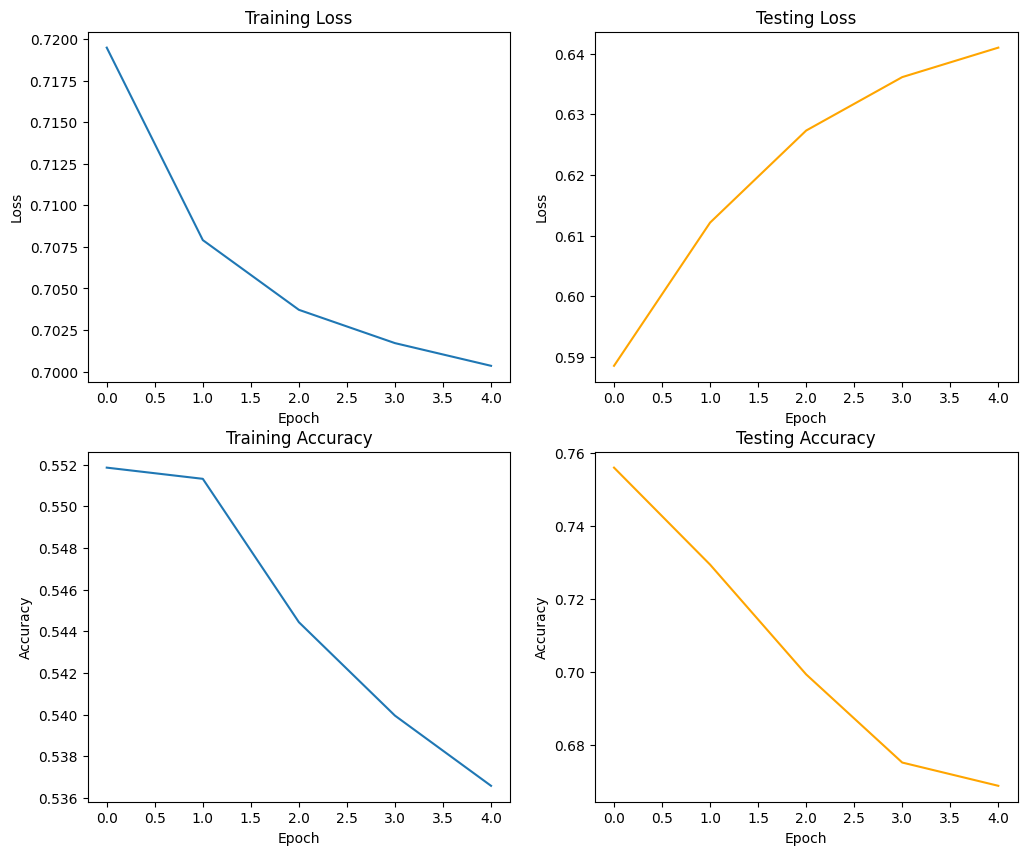

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel="Epoch", ylabel="Loss")
ax[0, 0].set_title("Training Loss")

ax[0, 1].plot(test_losses, "orange")
ax[0, 1].set(xlabel="Epoch", ylabel="Loss")
ax[0, 1].set_title("Testing Loss")

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel="Epoch", ylabel="Accuracy")
ax[1, 0].set_title("Training Accuracy")

ax[1, 1].plot(test_accs, "orange")
ax[1, 1].set(xlabel="Epoch", ylabel="Accuracy")
ax[1, 1].set_title("Testing Accuracy")

plt.show()

In [24]:
test_set_acc = compute_accuracy(X_test, y_test, theta)
print("Evaluation on validation and test set:")
print(f"Accuracy: {test_set_acc}")

Evaluation on validation and test set:
Accuracy: 0.6678321678321678


In [25]:
# compute auc, precision, recall
from sklearn.metrics import roc_auc_score, precision_score, recall_score

y_test_hat = predict(X_test, theta)
auc = roc_auc_score(y_test, y_test_hat)
precision = precision_score(y_test, y_test_hat.round())
recall = recall_score(y_test, y_test_hat.round())

# sensitivity, specificity
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_test_hat.round()).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"AUC: {auc:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"Sensitivity: {sensitivity:.3f}")
print(f"Specificity: {specificity:.3f}")

AUC: 0.504
Precision: 0.779
Recall: 0.796
Sensitivity: 0.796
Specificity: 0.231


## ANN optuna

In [7]:
import optuna

In [27]:
# Optuna Objective function to optimize AUC
def objective(trial):
    # Define hyperparameters to tune
    lr = trial.suggest_loguniform("lr", 1e-5, 1e-1)
    epochs = trial.suggest_int("epochs", 50, 500)
    batch_size = trial.suggest_categorical("batch_size", [32, 64, 128, 256])

    # Initialize parameters
    theta = np.random.uniform(size=X_train.shape[1])
    train_losses = []
    test_losses = []
    test_aucs = []

    # Training loop
    for epoch in range(epochs):
        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_train[i : i + batch_size]
            y_batch = y_train[i : i + batch_size]

            # Forward pass and loss
            y_hat = predict(X_batch, theta)
            train_loss = compute_loss(y_hat, y_batch)
            gradient = compute_gradient(X_batch, y_batch, y_hat)
            theta = update_theta(theta, gradient, lr)

        # Calculate AUC on test data
        y_test_hat = predict(X_test, theta)
        test_auc = roc_auc_score(y_test, y_test_hat)
        test_aucs.append(test_auc)

        # Stop early if AUC is satisfactory
        trial.report(test_auc, epoch)
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    return max(test_aucs)

In [28]:
# Run Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

[I 2025-01-04 05:25:21,161] A new study created in memory with name: no-name-9c3860c4-4302-4877-87dc-2d4effa0adac
/var/folders/y2/hzjfncr92llg100m08nwxmhc0000gn/T/ipykernel_73040/2620807037.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr", 1e-5, 1e-1)
[I 2025-01-04 05:25:21,498] Trial 0 finished with value: 0.5126348764357813 and parameters: {'lr': 0.007271073031578381, 'epochs': 63, 'batch_size': 64}. Best is trial 0 with value: 0.5126348764357813.
/var/folders/y2/hzjfncr92llg100m08nwxmhc0000gn/T/ipykernel_73040/2620807037.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr", 1e-5, 1e-1)
[I 2025-01

In [29]:
# Display best trial
print("Best trial:")
trial = study.best_trial
print(f"  AUC Score: {trial.value}")
print("  Params:")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

Best trial:
  AUC Score: 0.6661329620605638
  Params:
    lr: 0.09546485681767228
    epochs: 178
    batch_size: 64


## TPOT full features

In [8]:
from tpot import TPOTClassifier

# Set up TPOT with basic configuration
tpot = TPOTClassifier(
    generations=5,
    population_size=20,
    verbosity=2,
    scoring="roc_auc",  # AUC
    random_state=42,
    n_jobs=4
)

# Fit the model
tpot.fit(X_train, y_train)

Version 0.12.1 of tpot is outdated. Version 0.12.2 was released Friday February 23, 2024.


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.6771754229655959

Generation 2 - Current best internal CV score: 0.6779733402781117

Generation 3 - Current best internal CV score: 0.6825673078463976

Generation 4 - Current best internal CV score: 0.6825673078463976

Generation 5 - Current best internal CV score: 0.6825673078463976

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.9, min_samples_leaf=19, min_samples_split=5, n_estimators=100)


TPOTClassifier(generations=5, n_jobs=4, population_size=20, random_state=42,
               scoring='roc_auc', verbosity=2)

In [10]:
# Access the best pipeline directly after fitting
from pprint import pprint
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    roc_auc_score,
)


best_pipeline = tpot.fitted_pipeline_

#
y_pred = best_pipeline.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)

y_pred = (y_pred > 0.5).astype(int)  # Binarize predictions for threshold of 0.5
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)  # Same as sensitivity for positive class

# Calculate sensitivity and specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Extract model name and parameters
model_name = type(best_pipeline.steps[-1][1]).__name__  # Name of the final estimator
model_params = best_pipeline.steps[-1][1].get_params()  # Params of the final estimator

# Append results to list
result = {
    "Best model": best_pipeline,
    "Model Name": model_name,
    "Parameters": model_params,
    "AUC": auc,
    "Precision": precision,
    "Recall": recall,
    "Sensitivity": sensitivity,
    "Specificity": specificity,
}

pprint(result)

{'AUC': 0.6425339366515838,
 'Best model': Pipeline(steps=[('extratreesclassifier',
                 ExtraTreesClassifier(criterion='entropy', max_features=0.9,
                                      min_samples_leaf=19, min_samples_split=5,
                                      random_state=42))]),
 'Model Name': 'ExtraTreesClassifier',
 'Parameters': {'bootstrap': False,
                'ccp_alpha': 0.0,
                'class_weight': None,
                'criterion': 'entropy',
                'max_depth': None,
                'max_features': 0.9,
                'max_leaf_nodes': None,
                'max_samples': None,
                'min_impurity_decrease': 0.0,
                'min_samples_leaf': 19,
                'min_samples_split': 5,
                'min_weight_fraction_leaf': 0.0,
                'n_estimators': 100,
                'n_jobs': None,
                'oob_score': False,
                'random_state': 42,
                'verbose': 0,
                'w

# MLP

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import optuna
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

c:\Users\predator\anaconda3\envs\dili-3.10\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [8]:
# Split data into train and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42
)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_split, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_split, dtype=torch.float32).unsqueeze(1)
X_val_tensor = torch.tensor(X_val_split, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_split, dtype=torch.float32).unsqueeze(1)

# Create PyTorch datasets and loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

print("Train dataset size:", len(train_dataset))
print("Validation dataset size:", len(val_dataset))


Train dataset size: 1116
Validation dataset size: 125


In [9]:
# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, dropout):
        super(MLP, self).__init__()
        layers = []
        for i in range(num_layers):
            if i == 0:
                layers.append(nn.Linear(input_dim, hidden_dim))
            else:
                layers.append(nn.Linear(hidden_dim, hidden_dim))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout))
        layers.append(nn.Linear(hidden_dim, 1))  # Output layer for binary classification
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

In [10]:
# Training function
def train(model, dataloader, criterion, optimizer):
    model.train()
    total_loss = 0
    for X_batch, y_batch in dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(dataloader)

# Evaluation function
def evaluate(model, dataloader):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for X_batch, y_batch in dataloader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = torch.sigmoid(model(X_batch))
            y_true.extend(y_batch.cpu().numpy())
            y_pred.extend(outputs.cpu().numpy())
    y_true = torch.tensor(y_true)
    y_pred = torch.tensor(y_pred)
    auc = roc_auc_score(y_true, y_pred)
    return auc

In [11]:
# Define the Optuna objective function
def objective(trial):
    # Suggest hyperparameters
    hidden_dim = trial.suggest_int("hidden_dim", 32, 256, step=32)
    num_layers = trial.suggest_int("num_layers", 1, 5)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)
    lr = trial.suggest_loguniform("lr", 1e-4, 1e-2)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64, 128])

    # Create model, optimizer, and criterion
    model = MLP(input_dim=X_train.shape[1], hidden_dim=hidden_dim, num_layers=num_layers, dropout=dropout).to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.BCEWithLogitsLoss()

    # Adjust DataLoader batch size
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Training loop
    for epoch in range(200):  # Limit epochs for faster tuning
        train_loss = train(model, train_loader, criterion, optimizer)

    # Evaluate the model on validation set
    auc = evaluate(model, val_loader)

    # Store metrics for later analysis
    trial.set_user_attr("AUC", auc)
    trial.set_user_attr("Train Loss", train_loss)

    return auc


In [ ]:

# Create Optuna study and optimize (21min)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

In [26]:
# Print best trial
print("Best trial:")
trial = study.best_trial
print(f"AUC: {trial.value}")
print("Best Hyperparameters:")
for key, value in trial.params.items():
    print(f"  {key}: {value}")

Best trial:
AUC: 0.7270800211976682
Best Hyperparameters:
  hidden_dim: 64
  num_layers: 1
  dropout: 0.23188179158539773
  lr: 0.00014122738845363748
  batch_size: 128


In [13]:
# Train the best model
# best_params = trial.params
best_params = {
    "hidden_dim": 64,
    "num_layers": 1,
    "dropout": 0.23188179158539773,
    "lr": 0.00014122738845363748,
    "batch_size": 128,
}

best_model = MLP(input_dim=X_train.shape[1], hidden_dim=best_params["hidden_dim"],
                 num_layers=best_params["num_layers"], dropout=best_params["dropout"]).to(device)
optimizer = optim.Adam(best_model.parameters(), lr=best_params["lr"])
criterion = nn.BCEWithLogitsLoss()
train_loader = DataLoader(train_dataset, batch_size=best_params["batch_size"], shuffle=True)

for epoch in range(200):  # Retrain for a set number of epochs
    train_loss = train(best_model, train_loader, criterion, optimizer)

In [14]:
# Evaluate the best model on the validation set
best_auc = evaluate(best_model, val_loader)
print(f"Best Model Validation AUC: {best_auc:.4f}")


Best Model Validation AUC: 0.7165


In [15]:
# evaluate on test set
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

test_auc = evaluate(best_model, test_loader)
print(f"Best Model Test AUC: {test_auc:.4f}")

Best Model Test AUC: 0.6661


In [16]:
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    f1_score,
)


def find_optimal_threshold(y_true, y_pred_proba):
    """
    Find optimal threshold based on sensitivity >= 0.7 or best F1 score.
    """
    best_threshold = 0.5
    best_metrics = {
        "accuracy": 0,
        "precision": 0,
        "recall": 0,
        "sensitivity": 0,
        "specificity": 0,
        "f1": 0,
    }

    for threshold in np.arange(0.0, 1.0, 0.01):
        y_pred = (y_pred_proba >= threshold).astype(int)

        # Calculate metrics
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        accuracy = accuracy_score(y_true, y_pred)
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        f1 = f1_score(y_true, y_pred)

        if sensitivity >= 0.7 or f1 > best_metrics["f1"]:
            best_threshold = threshold
            best_metrics = {
                "accuracy": accuracy,
                "precision": precision,
                "recall": recall,
                "sensitivity": sensitivity,
                "specificity": specificity,
                "f1": f1,
            }

    return best_threshold, best_metrics

In [18]:

best_model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = torch.sigmoid(best_model(X_batch))
        y_true.extend(y_batch.cpu().numpy())
        y_pred.extend(outputs.cpu().numpy())
# y_true = torch.tensor(y_true)
# y_pred = torch.tensor(y_pred)

# Find optimal threshold
best_threshold, best_metrics = find_optimal_threshold(y_true, y_pred)
best_threshold, best_metrics

c:\Users\predator\anaconda3\envs\dili-3.10\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\predator\anaconda3\envs\dili-3.10\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\predator\anaconda3\envs\dili-3.10\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\p

(0.48,
 {'accuracy': 0.6783216783216783,
  'precision': 0.837696335078534,
  'recall': 0.7239819004524887,
  'sensitivity': 0.7239819004524887,
  'specificity': 0.5230769230769231,
  'f1': 0.7766990291262136})

# PCA

In [11]:
from tpot import TPOTClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    confusion_matrix,
)
import matplotlib.pyplot as plt

In [12]:
# List to store AUC scores for different PCA dimensions
dimensions = [10]
tpot_results = []  # List to store results

# Loop over different numbers of PCA components
for n_components in dimensions:
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Set up TPOT with basic configuration
    tpot = TPOTClassifier(
        generations=5,
        population_size=20,
        verbosity=2,
        scoring="roc_auc",  # AUC
        random_state=42,
        n_jobs=14,  # Use 4 cores
    )

    # Fit TPOT on the PCA-transformed data
    tpot.fit(X_train_pca, y_train)

    # Access the best pipeline directly after fitting
    best_pipeline = tpot.fitted_pipeline_

    # Check if the model has predict_proba
    if hasattr(best_pipeline, "predict_proba"):
        y_pred = best_pipeline.predict_proba(X_test_pca)[:, 1]
        auc = roc_auc_score(y_test, y_pred)
    else:
        # Fallback to accuracy if predict_proba is unavailable
        y_pred = best_pipeline.predict(X_test_pca)
        auc = accuracy_score(
            y_test, y_pred
        )  # Substitute with accuracy if AUC can't be calculated

    y_pred = (y_pred > 0.5).astype(int)  # Binarize predictions for threshold of 0.5
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)  # Same as sensitivity for positive class

    # Calculate sensitivity and specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    # Extract model name and parameters
    model_name = type(
        best_pipeline.steps[-1][1]
    ).__name__  # Name of the final estimator
    model_params = best_pipeline.steps[-1][
        1
    ].get_params()  # Params of the final estimator

    # Append results to list
    result = {
        "Best model": best_pipeline,
        "PCA Components": n_components,
        "Model Name": model_name,
        "Parameters": model_params,
        "AUC": auc,
        "Precision": precision,
        "Recall": recall,
        "Sensitivity": sensitivity,
        "Specificity": specificity,
    }
    tpot_results.append(result)

    print(result)

Version 0.12.1 of tpot is outdated. Version 0.12.2 was released Friday February 23, 2024.


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.6363887439469771

Generation 2 - Current best internal CV score: 0.6434093996027095

Generation 3 - Current best internal CV score: 0.6443992666606986

Generation 4 - Current best internal CV score: 0.6504705054491712

Generation 5 - Current best internal CV score: 0.6514378139794091

Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=22, p=1, weights=distance)
{'Best model': Pipeline(steps=[('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=22, p=1,
                                      weights='distance'))]), 'PCA Components': 10, 'Model Name': 'KNeighborsClassifier', 'Parameters': {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 22, 'p': 1, 'weights': 'distance'}, 'AUC': 0.6331360946745561, 'Precision': 0.8260869565217391, 'Recall': 0.6877828054298643, 'Sensitivity': 0.6877828054298643, 'Specificity': 0.5076923076923077}


In [13]:
# Convert results to DataFrame
tpot_df = pd.DataFrame(tpot_results)
tpot_df

,Best model,PCA Components,Model Name,Parameters,AUC,Precision,Recall,Sensitivity,Specificity
0,"(KNeighborsClassifier(n_neighbors=22, p=1, wei...",10,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.633136,0.826087,0.687783,0.687783,0.507692


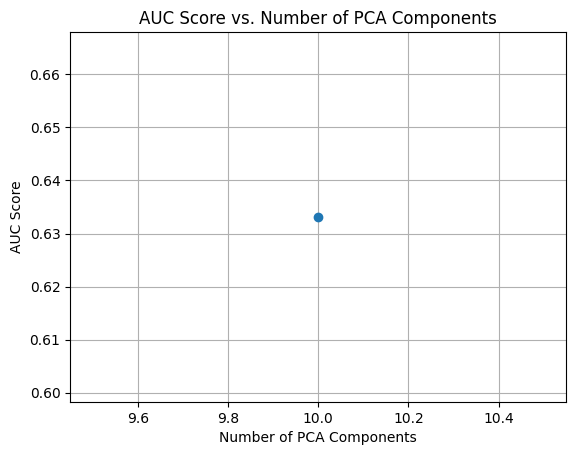

In [14]:
# Plot AUC scores against the number of PCA components
plt.plot(tpot_df["PCA Components"], tpot_df["AUC"], marker="o")
plt.xlabel("Number of PCA Components")
plt.ylabel("AUC Score")
plt.title("AUC Score vs. Number of PCA Components")
plt.grid()
plt.show()

In [15]:
import joblib

# Save results using Joblib
joblib.dump(tpot_results, "models/tpot_nlp_openai_pca_v3.joblib")
print("Results saved to tpot_nlp_openai_pca_v3.joblib")

Results saved to tpot_nlp_openai_pca_v3.joblib
